# Filtrado de grupos

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
data =pd.read_csv("../../datasets/customer-churn-model/Customer Churn Model.txt")

In [9]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [10]:
data.describe()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


### Forma 1: Dividir utilizando la distribución normal

In [12]:
random_array = np.random.normal(0,1,3333)

(array([ 15.,  64., 319., 781., 971., 737., 329., 101.,  15.,   1.]),
 array([-3.39982219, -2.65143753, -1.90305287, -1.15466821, -0.40628355,
         0.34210112,  1.09048578,  1.83887044,  2.5872551 ,  3.33563976,
         4.08402443]),
 <a list of 10 Patch objects>)

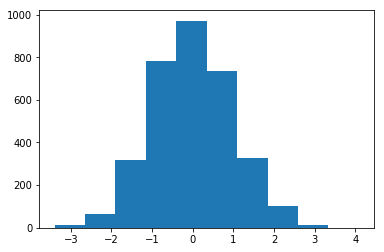

In [14]:
plt.hist(random_array)

In [16]:
check = random_array < 0.8

In [17]:
check

array([ True, False,  True, ..., False,  True, False])

In [22]:
check[0:10]

array([ True, False,  True,  True, False,  True,  True,  True,  True,
        True])

In [25]:
training = data[check]

In [26]:
training.describe()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
count,2646.000000,2646.000000,2646.000000,2646.000000,2646.000000,2646.000000,2646.000000,2646.000000,2646.000000,2646.000000,2646.000000,2646.000000,2646.000000,2646.000000,2646.000000,2646.000000
mean,101.242630,436.883598,8.131519,180.364815,100.552532,30.662551,201.554384,100.117158,17.132305,201.192101,99.942177,9.053776,10.245427,4.501134,2.766784,1.567649
std,39.981358,42.169628,13.696028,54.915633,20.260088,9.335636,50.624086,20.081702,4.303049,50.171699,19.631118,2.257773,2.806405,2.481957,0.757705,1.308889
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,415.000000,0.000000,143.600000,87.000000,24.410000,167.100000,87.000000,14.200000,167.625000,87.000000,7.542500,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,181.100000,101.000000,30.790000,202.500000,100.000000,17.210000,201.850000,100.000000,9.085000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,415.000000,20.000000,217.200000,114.000000,36.920000,235.475000,114.000000,20.017500,235.575000,113.000000,10.600000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,377.500000,164.000000,16.990000,18.900000,20.000000,5.100000,8.000000


In [29]:
test = data[~check]

In [30]:
test.describe()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
count,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000
mean,100.379913,438.333333,7.973799,177.503785,99.985444,30.176215,198.769432,100.103348,16.895721,199.639301,100.745269,8.983668,10.205968,4.395924,2.756099,1.544396
std,39.223956,43.150977,13.668052,52.682713,19.323540,8.956042,51.034771,19.311987,4.337912,52.112735,19.326881,2.345129,2.736804,2.379550,0.738914,1.341421
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,43.900000,46.000000,3.730000,23.200000,42.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,144.350000,87.000000,24.540000,165.150000,86.500000,14.040000,164.700000,86.000000,7.415000,8.400000,3.000000,2.270000,1.000000
50%,99.000000,415.000000,0.000000,176.000000,100.000000,29.920000,199.600000,101.000000,16.970000,198.900000,102.000000,8.950000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,19.000000,211.600000,113.000000,35.975000,233.550000,114.000000,19.850000,234.600000,114.000000,10.555000,12.000000,6.000000,3.240000,2.000000
max,217.000000,510.000000,51.000000,334.300000,163.000000,56.830000,361.800000,164.000000,30.750000,395.000000,175.000000,17.770000,20.000000,19.000000,5.400000,9.000000


# Con la librería sklearn

In [31]:
from sklearn.model_selection import train_test_split

In [34]:
(train, test) = train_test_split(data, test_size = 0.2)

In [35]:
train.describe()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
count,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,101.568267,437.397974,8.139160,179.857764,100.397974,30.576395,201.115604,99.989497,17.095030,200.565266,100.002626,9.025529,10.244561,4.507502,2.766572,1.548762
std,39.566327,42.503189,13.688814,54.585816,20.207690,9.279584,50.209463,19.935559,4.267853,50.937672,19.716594,2.292235,2.822463,2.472236,0.762022,1.314968
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,42.200000,12.000000,3.590000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.250000,408.000000,0.000000,143.325000,87.000000,24.365000,166.600000,87.000000,14.160000,166.625000,86.000000,7.500000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.700000,101.000000,30.550000,201.000000,100.000000,17.090000,200.850000,100.000000,9.040000,10.300000,4.000000,2.780000,1.000000
75%,128.000000,510.000000,20.000000,216.875000,114.000000,36.867500,235.100000,113.000000,19.980000,235.675000,114.000000,10.607500,12.100000,6.000000,3.270000,2.000000
max,232.000000,510.000000,51.000000,346.800000,165.000000,58.960000,361.800000,170.000000,30.750000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [36]:
test.describe()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
count,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.00000
mean,99.052474,436.320840,7.938531,179.444678,100.586207,30.505997,200.439730,100.613193,17.037616,202.098201,100.527736,9.094468,10.208246,4.367316,2.756627,1.61919
std,40.796631,41.860438,13.695667,54.030875,19.519367,9.185160,52.716996,19.877938,4.480716,49.110965,18.974229,2.210084,2.667777,2.415232,0.720356,1.31706
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,38.000000,1.970000,0.000000,0.000000,0.000000,0.00000
25%,70.000000,411.500000,0.000000,145.800000,88.000000,24.785000,166.450000,87.000000,14.150000,169.100000,88.000000,7.610000,8.500000,3.000000,2.300000,1.00000
50%,100.000000,415.000000,0.000000,177.500000,102.000000,30.180000,203.600000,101.000000,17.310000,203.500000,100.000000,9.160000,10.200000,4.000000,2.750000,1.00000
75%,125.000000,415.000000,17.000000,215.700000,114.000000,36.670000,236.300000,115.000000,20.085000,234.200000,113.000000,10.540000,12.100000,6.000000,3.270000,2.00000
max,243.000000,510.000000,49.000000,350.800000,157.000000,59.640000,363.700000,156.000000,30.910000,345.800000,158.000000,15.560000,17.900000,15.000000,4.830000,8.00000


### Con shuffle

In [38]:
import sklearn

In [40]:

shuffled_data = sklearn.utils.shuffle(data)


In [41]:
shuffled_data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
1170,IN,108,415,392-2268,no,no,0,199.3,104,33.88,...,92,19.06,140.1,57,6.30,15.2,2,4.10,0,False.
303,IA,158,415,360-6868,no,no,0,158.0,106,26.86,...,114,24.86,241.1,89,10.85,9.1,4,2.46,1,False.
670,WV,32,408,370-7565,no,yes,26,266.7,109,45.34,...,107,19.75,212.8,98,9.58,16.3,4,4.40,1,False.
1513,NV,37,415,362-7604,no,no,0,233.7,114,39.73,...,109,17.67,212.7,101,9.57,12.0,2,3.24,2,False.
2633,RI,63,415,371-1187,no,no,0,180.5,126,30.69,...,98,19.55,232.5,73,10.46,10.6,3,2.86,0,False.


In [44]:
cutid = int( 0.8 * len(data));
print (cutid)
train2 = shuffled_data[0:cutid]
test2= shuffled_data[cutid+1:len(data)]

2666


In [45]:
train2.describe()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
count,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.550638,437.079895,8.307952,179.837097,100.463241,30.572862,200.915754,100.049512,17.078020,200.725694,100.058515,9.032764,10.233308,4.454239,2.763518,1.566767
std,39.894098,42.310485,13.720558,54.362735,19.890855,9.241635,50.828285,20.095900,4.320348,50.986730,19.538530,2.294486,2.772877,2.423843,0.748635,1.299244
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,36.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,144.025000,87.000000,24.485000,166.625000,87.000000,14.162500,166.325000,87.000000,7.482500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.500000,101.000000,30.520000,201.150000,101.000000,17.095000,200.800000,100.000000,9.040000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,21.000000,216.775000,114.000000,36.855000,235.500000,113.750000,20.020000,235.475000,113.000000,10.597500,12.000000,6.000000,3.240000,2.000000
max,243.000000,510.000000,51.000000,337.400000,165.000000,57.360000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [46]:
test2.describe()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
count,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000
mean,103.082583,437.636637,7.274775,179.608859,100.327327,30.533994,201.232282,100.363363,17.105075,201.377477,100.288288,9.061967,10.240240,4.584084,2.765330,1.549550
std,39.513821,42.659485,13.544175,54.924866,20.796712,9.337232,50.328419,19.239686,4.278098,48.915337,19.712316,2.201097,2.850923,2.604736,0.769812,1.379149
min,2.000000,408.000000,0.000000,0.000000,0.000000,0.000000,43.900000,48.000000,3.730000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,76.000000,409.750000,0.000000,142.825000,88.000000,24.282500,165.900000,87.000000,14.100000,169.050000,88.000000,7.610000,8.300000,3.000000,2.240000,1.000000
50%,101.000000,415.000000,0.000000,179.250000,100.000000,30.470000,202.400000,99.000000,17.205000,202.150000,100.000000,9.095000,10.300000,4.000000,2.780000,1.000000
75%,128.000000,510.000000,0.000000,215.900000,114.000000,36.700000,233.800000,114.000000,19.872500,234.850000,114.000000,10.567500,12.200000,6.000000,3.290000,2.000000
max,225.000000,510.000000,49.000000,350.800000,158.000000,59.640000,337.100000,168.000000,28.650000,367.700000,157.000000,16.550000,18.000000,17.000000,4.860000,7.000000
